# Hypothesis

I believe the scaled RandomForest will provide the best predictions due to the number of features included in the dataset.

# Code

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import auc

# EDA and Data Cleaning

In [2]:
train_df = pd.read_csv('Resources/2019loans.csv')
test_df = pd.read_csv('Resources/2020Q1loans.csv')

In [3]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [6]:
#look at target ratio
train_df.loan_status.value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [7]:
test_df.loan_status.value_counts()

high_risk    2351
low_risk     2351
Name: loan_status, dtype: int64

In [8]:
# change target names to 0 or 1
train_df["loan_status"] = [1 if x == "high_risk" else 0 for x in train_df.loan_status]
test_df["loan_status"] = [1 if x == "high_risk" else 0 for x in test_df.loan_status]

In [9]:
cat_df = train_df.select_dtypes(include='object')
cat_df.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [10]:
for col in cat_df.columns:
    print(cat_df[col].value_counts())
    print()

MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

n    12180
Name: pymnt_plan, dtype: int64

w    11158
f     1022
Name: initial_list_status, dtype: int64

Individual    10400
Joint App      1780
Name: application_type, dtype: int64

N    11832
Y      348
Name: hardship_flag, dtype: int64

N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [11]:
train_df_cat = pd.get_dummies(cat_df)

In [12]:
num_train_df = train_df.select_dtypes(include=["float64", "int64"])
num_train_df

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,57107,57107,13375.0,0.1797,483.34,223000.0,0,29.99,0.0,0.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,141451,141451,21000.0,0.1308,478.68,123000.0,0,11.26,2.0,0.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,321143,321143,20000.0,0.1240,448.95,197000.0,0,11.28,0.0,0.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,11778,11778,3000.0,0.1240,100.22,45000.0,0,18.08,0.0,0.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,0,27.77,0.0,2.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,28000.0,1,28.42,0.0,0.0,...,0.0,3.0,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0
12176,354944,354944,15000.0,0.1774,540.34,50000.0,1,23.43,4.0,0.0,...,2.0,2.0,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0
12177,354973,354973,3600.0,0.1862,131.28,60000.0,1,28.80,0.0,1.0,...,0.0,5.0,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0
12178,355002,355002,15000.0,0.0881,475.68,62000.0,1,11.44,0.0,0.0,...,0.0,1.0,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0


In [13]:
train_df_temp = pd.merge(num_train_df, train_df_cat, left_index=True, right_index=True)

train_df_temp.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,0,29.99,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,0,11.26,2.0,0.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,0,11.28,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,0,18.08,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,0,27.77,0.0,2.0,...,0,1,0,1,1,0,1,0,1,0


In [14]:
cat_df2 = test_df.select_dtypes(include='object')
cat_df2.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,RENT,Not Verified,n,w,Individual,N,N
2,RENT,Not Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,RENT,Not Verified,n,w,Individual,N,N


In [15]:
for col in cat_df2.columns:
    print(cat_df2[col].value_counts())
    print()

MORTGAGE    2131
RENT        2033
OWN          533
ANY            5
Name: home_ownership, dtype: int64

Not Verified       2454
Source Verified    1715
Verified            533
Name: verification_status, dtype: int64

n    4702
Name: pymnt_plan, dtype: int64

w    4377
f     325
Name: initial_list_status, dtype: int64

Individual    4165
Joint App      537
Name: application_type, dtype: int64

N    4621
Y      81
Name: hardship_flag, dtype: int64

N    4702
Name: debt_settlement_flag, dtype: int64



In [16]:
test_df_cat = pd.get_dummies(cat_df2)
test_df_cat

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
2,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
3,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1
4698,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4699,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1
4700,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1


In [17]:
num_test_df = test_df.select_dtypes(include=["float64","int64"])
num_test_df

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,67991,67991,40000.0,0.0819,814.70,140000.0,0,19.75,0.0,1.0,...,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,25429,25429,6000.0,0.1524,208.70,55000.0,0,11.52,2.0,0.0,...,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,38496,38496,3600.0,0.1695,128.27,42000.0,0,6.74,0.0,0.0,...,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,19667,19667,20000.0,0.1524,478.33,100000.0,0,12.13,0.0,2.0,...,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,37505,37505,3600.0,0.1240,120.27,50000.0,0,16.08,0.0,3.0,...,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,1,15.74,0.0,0.0,...,0.0,2.0,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0
4698,77291,77291,24000.0,0.0756,747.22,50000.0,1,26.81,0.0,0.0,...,0.0,2.0,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0
4699,77292,77292,10000.0,0.2305,387.36,33000.0,1,38.51,0.0,2.0,...,0.0,5.0,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0
4700,77297,77297,8000.0,0.1862,205.86,38000.0,1,16.36,0.0,1.0,...,0.0,3.0,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0


In [18]:
test_df_temp = pd.merge(num_test_df, test_df_cat, left_index=True, right_index=True)
test_df_temp.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,0,19.75,0.0,1.0,...,0,0,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,0,11.52,2.0,0.0,...,0,0,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,0,6.74,0.0,0.0,...,0,0,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,0,12.13,0.0,2.0,...,0,0,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,0,16.08,0.0,3.0,...,0,0,1,0,1,1,0,1,0,1


In [19]:
for col in train_df_temp.columns:
    if col not in test_df_temp.columns:
        print(col)
        test_df_temp[col] = 0 

debt_settlement_flag_Y


In [20]:
test_df_temp.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,0,19.75,0.0,1.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,0,11.52,2.0,0.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,0,6.74,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,0,12.13,0.0,2.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,0,16.08,0.0,3.0,...,0,1,0,1,1,0,1,0,1,0


In [21]:
drop_cols = ["Unnamed: 0","index","pymnt_plan_n"]

In [22]:
train_df_temp.drop(drop_cols, axis=1, inplace=True)
test_df_temp.drop(drop_cols, axis=1, inplace=True)

In [23]:
X_train = train_df_temp.drop("loan_status", axis=1)
y_train = train_df_temp.loan_status

X_test = test_df_temp.drop("loan_status", axis=1)
y_test = test_df_temp.loan_status

## Unscaled Logistic Regression

In [24]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

Training Score: 0.6499178981937602
Testing Score: 0.5163760102084219

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.30      0.39      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.49      4702
weighted avg       0.52      0.52      0.49      4702


CONFUSION MATRIX:
[[1714  637]
 [1637  714]]


C:\Users\19729\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


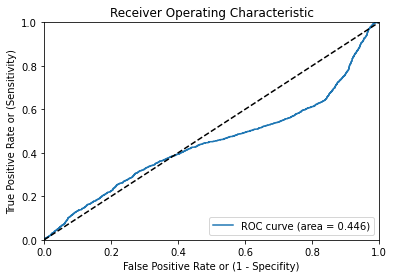

In [25]:
y_proba = lr.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

## Unscaled Decision Tree Classifier

In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(f'Training Score: {dt.score(X_train, y_train)}')
print(f'Testing Score: {dt.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

Training Score: 1.0
Testing Score: 0.5589111016588686

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.41      0.48      2351
           1       0.55      0.70      0.61      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.55      4702
weighted avg       0.56      0.56      0.55      4702


CONFUSION MATRIX:
[[ 974 1377]
 [ 697 1654]]


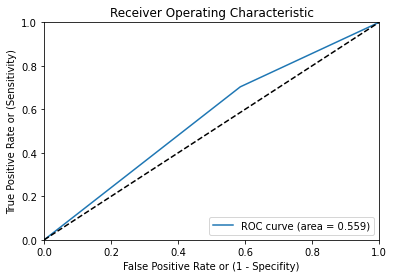

In [27]:
y_proba = dt.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

## Unscaled Random Forest Classifier

In [28]:
rf = RandomForestClassifier(random_state=42, n_estimators=25)
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

Training Score: 0.9989326765188834
Testing Score: 0.6320714589536367

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      2351
           1       0.60      0.79      0.68      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702


CONFUSION MATRIX:
[[1114 1237]
 [ 493 1858]]


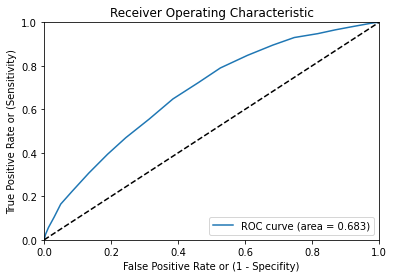

In [29]:
y_proba = rf.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

## Scaled Logistic Regression

In [30]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Train the Logistic Regression model on the scaled data and print the model score

lr = LogisticRegression()
lr = lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

Training Score: 0.480623973727422
Testing Score: 0.560187154402382

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2351
           1       0.77      0.76      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702


CONFUSION MATRIX:
[[1819  532]
 [ 562 1789]]


C:\Users\19729\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


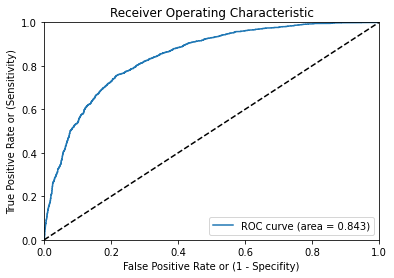

In [32]:
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

## Scaled Decision Tree Classifier

In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

Training Score: 1.0
Testing Score: 0.5595491280306253

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      2351
           1       0.55      0.70      0.61      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.55      4702
weighted avg       0.56      0.56      0.55      4702


CONFUSION MATRIX:
[[ 981 1370]
 [ 701 1650]]


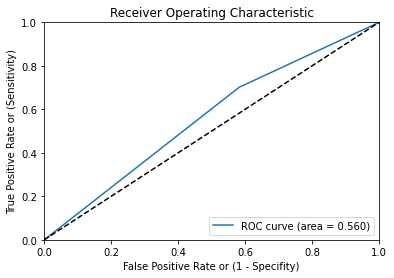

In [34]:
y_proba = dt.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

## Scaled Random Forest Classifier

In [35]:
# Train a Random Forest Classifier model on the scaled data and print the model score
rf = RandomForestClassifier(random_state=42, n_estimators=25)
rf = rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test)

print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

Training Score: 0.9989326765188834
Testing Score: 0.6327094853253934

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.45      0.55      0.49      2351
           1       0.41      0.32      0.36      2351

    accuracy                           0.43      4702
   macro avg       0.43      0.43      0.43      4702
weighted avg       0.43      0.43      0.43      4702


CONFUSION MATRIX:
[[1289 1062]
 [1604  747]]


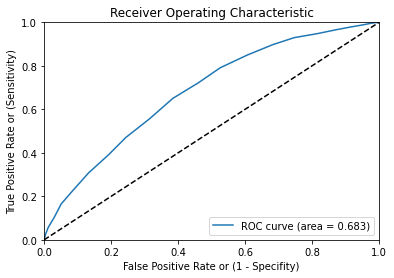

In [36]:
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

# Takeaways

### The Scaled Logistic Regression Model was the best as predicting credit risk with a 0.77% accuracy score. Scaling the tree based models didn't produce a significant improvement in accuracy.